# Projet 3 : Concevez une application au service de la santé

Les données sont disponibles à l'adresse suivante : https://fr.openfoodfacts.org/

#### Idée : Scanner n'importe quel produit et obtenir un indicateur sur la qualité nutritionelle du produit, note basé sur le Nutri-Score


#### Objectifs : 

#### - Evaluer la faisabilité du calcul du Nutri-Score sur les données

#### - Evaluer la pertinence d'un modèle prédictif pour le calcul du Nutri-Score


#### Informations sur le Nutri-Score :

Le Nutri-Score, aussi appelé système 5 couleurs, est un système d'étiquetage nutritionnel basé sur un logo avec cinq valeurs allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il est mis en place par le gouvernement Français en 2016 dans le cadre de la loi de modernisation du système de santé.

Le score est calculé par un système de points, le score le plus faible étant le meilleur :

Eléments défavorables au score :
- apport calorique
- teneur en sucre
- teneur en graisses saturés
- teneur en sel

Eléments favorables au score :
- teneur en fruits, légumes, légumineuses et oléagineux
- teneur en fibres
- teneur en protéines

Des points sont attribués en fonction des éléments favorables et défavorables et un grade est attribué à chaque produit en fonction de son score :

Pour les aliments :

A : <0

B : 0 à 2

C : 3 à 10

D : 11 à 18

E : 19 à 40


Pour les boissons :

A : Eau

B : <2

B : 2 à 5

C : 6 à 9

D : 10 à 40

Pour plus d'informations : https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/

##### Chargement des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##### Lecture des données

In [2]:
# -------Chemin d'accès aux données----------
path = "C:/OpenClassRoom/Projet_3/data"

# -------Lecture des données---------
data = pd.read_csv(os.path.join(path, "fr.openfoodfacts.org.products.csv"), sep='\t', low_memory=False)

## 1 - Nettoyage des données

### 1.1 Information sur les données

#### 1.1.1 Affichage des données

In [3]:
# Affiche les 5 premières lignes
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000000010,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1550246813,2019-02-15T16:06:53Z,1550246813,2019-02-15T16:06:53Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000000000000010,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1550246831,2019-02-15T16:07:11Z,1550246831,2019-02-15T16:07:11Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il y a 175 colonnes qui renseignent notamment le nom du produit, les pays de distribution, et la composition nutritionnelle 

#### 1.1.2 Structure des données

In [4]:
# Structure : entrées, colonnes, types et valeurs non nulles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877958 entries, 0 to 877957
Columns: 175 entries, code to carnitine_100g
dtypes: float64(117), int64(2), object(56)
memory usage: 1.1+ GB


In [5]:
print("Il y a {} produits dans la table".format(len(data)))

Il y a 877958 produits dans la table


#### 1.1.3 Données vendues sur le sol français

In [6]:
countries = []
for label_country in data.countries_fr.unique() :
    if "FR" in str(label_country).upper() :
        countries.append(label_country)
data_fr = data[data["countries_fr"].isin(countries)]    

print("Seuls les produits vendus sur le sol français sont séléctionnés et leur nombre est de : {}, soit {:.2f} % des données".format(len(data_fr), len(data_fr)/len(data)*100))

Seuls les produits vendus sur le sol français sont séléctionnés et leur nombre est de : 568535, soit 64.76 % des données


#### 1.1.4 Données dont le nom du produit est indiqué

In [7]:
data_fr = data_fr[data_fr["product_name"].isna() == False]

### 1.2 Disponibilité des données renseignés 

On affiche les colonnes dont les données sont renseignés pour au moins 20%

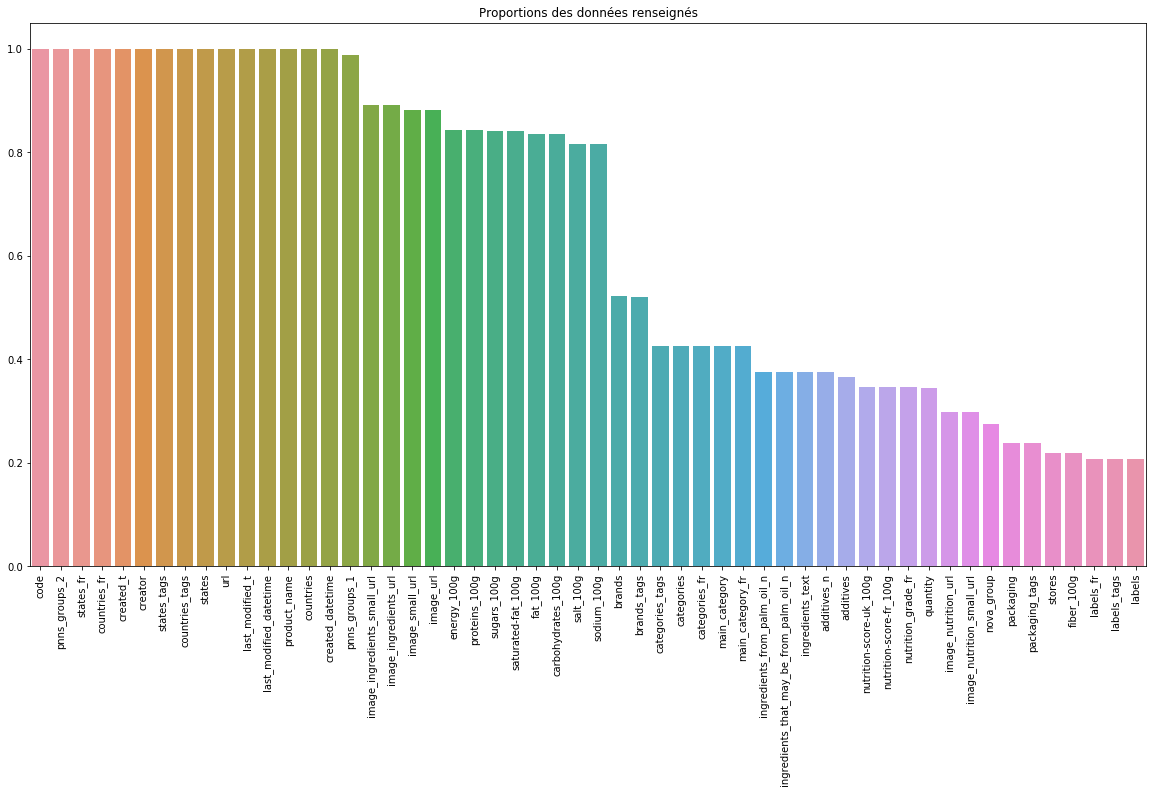

In [8]:
data_na = 1 - (data_fr.isna().sum(axis=0))/len(data_fr)
data_na = data_na[data_na>0.2].sort_values(ascending=False)

fig = plt.figure(1, figsize=(20,10))
sns.barplot(data_na.index, data_na.values)

plt.xticks(rotation=90)
plt.title("Proportions des données renseignés")
plt.show()

#### 1.2.1 Teneur en fruits et légumes

In [9]:
for col in data_fr :
    if 'fruit' in col :
        print(col, ":", 100*data_fr[col].isna().sum()/len(data_fr), "% de données manquantes")

fruits-vegetables-nuts_100g : 99.33349171883259 % de données manquantes
fruits-vegetables-nuts-dried_100g : 99.95764108740853 % de données manquantes
fruits-vegetables-nuts-estimate_100g : 98.3699185419694 % de données manquantes


Il y a des colonnes qui indiquent la proportion en fruits et légumes pour 100g mais les proportions de données manquantes sont beaucoup trop importantes pour leur exploitation

#### 1.3.1 Noms des catégories et nombres de produits dans chacune

In [10]:
data_fr['main_category_fr'].value_counts()

Boissons                                               19798
Snacks                                                 12383
Plats préparés                                          8263
Aliments et boissons à base de végétaux                 7556
Epicerie                                                7496
Chocolats                                               6090
Fromages de France                                      5534
Gâteaux                                                 5480
Biscuits                                                5325
Volailles                                               5150
Plats préparés à la viande                              4805
Confitures                                              4691
Fromages                                                4509
Produits à tartiner salés                               4480
Conserves                                               4452
Desserts                                                4188
Pains                   

In [11]:
print("La proportion des produits qui sont catégorisés est de : {:.2f} %".format(100*data_fr['main_category_fr'].isna().sum()/len(data_fr)))

La proportion des produits qui sont catégorisés est de : 57.43 %


### 1.3 Séléction des données

#### 1.3.1 Suppression des colonnes renseignés à moins de 20 % (hormi le Nutri-Score)

In [12]:
nutrition_grade_fr = data_fr["nutrition_grade_fr"]
col_to_del = []
for col in data_fr :
    if data_fr[col].isna().sum()/len(data_fr)>0.8 :
        col_to_del.append(col)
df = data_fr.drop(columns=col_to_del)

In [13]:
for col in data_fr :
    if 'fruit' in col :
        print(col, ":", 100*data_fr[col].isna().sum()/len(data_fr), "% de données manquantes")

fruits-vegetables-nuts_100g : 99.33349171883259 % de données manquantes
fruits-vegetables-nuts-dried_100g : 99.95764108740853 % de données manquantes
fruits-vegetables-nuts-estimate_100g : 98.3699185419694 % de données manquantes


La proportion de fruits et légumes n'est globalement pas renseignée

#### 1.3.2 Les macro-nutriments (renseignés à plus de 20%)
Les macro nutriments sont repérés par leur suffixe "_100g"

In [14]:
macro_nutriments_labels = []
print("% de produits non renseignés :")
for col in df :
    if "_100g" in col :
        macro_nutriments_labels.append(col)
        print(col, ":", round(100*df[col].isna().sum()/len(df),2))

% de produits non renseignés :
energy_100g : 15.62
fat_100g : 16.38
saturated-fat_100g : 15.94
carbohydrates_100g : 16.42
sugars_100g : 15.9
fiber_100g : 78.1
proteins_100g : 15.69
salt_100g : 18.48
sodium_100g : 18.48
nutrition-score-fr_100g : 65.41
nutrition-score-uk_100g : 65.41


Suppression des variables qui ne sont pas des nutriments

In [15]:
if 'nutrition-score-uk_100g' in macro_nutriments_labels :
    macro_nutriments_labels.remove('nutrition-score-uk_100g')
if 'nutrition-score-fr_100g' in macro_nutriments_labels :
    macro_nutriments_labels.remove('nutrition-score-fr_100g')

#### 1.3.3 Remplisssage des valeurs manquantes pour les fibres

In [16]:
df["fiber_100g"] = df["fiber_100g"].fillna(0)

Les fibres n'apportent pas de calorie et leurs quantités ne sont pas nécessairement indiquées sur les produits

Lorsque l'information n'est pas renseigné, c'est probablement qu'il n'y en a pas

#### 1.3.4 Suppression des valeurs abérrantes

Nombre de produits dont les valeurs sont supérieurs à 100 g

In [17]:
(df[macro_nutriments_labels].drop(columns='energy_100g')>100).sum()

fat_100g               6
saturated-fat_100g     7
carbohydrates_100g    40
sugars_100g           14
fiber_100g            10
proteins_100g          6
salt_100g             20
sodium_100g           15
dtype: int64

Nombre de produits dont les valeurs sont inférieurs à 0 g

In [18]:
(df[macro_nutriments_labels].drop(columns='energy_100g')<0).sum()

fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           1
fiber_100g            0
proteins_100g         0
salt_100g             0
sodium_100g           0
dtype: int64

Suppression des produits dont l'énergie supérieur à 3700 kJ (3700 kJ/100g = 100% de graisses)

Suppresion des produits supérieurs à 100g pour 100g ou inférieurs à 0g pour 100g

In [19]:
max_energy = 3700
print("Le nombre de produits dont l'énergie est supérieur à 3700 kJ est de : {}".format(sum(df['energy_100g']>max_energy)))

Le nombre de produits dont l'énergie est supérieur à 3700 kJ est de : 3793


In [20]:
# Enlève les valeurs supérieurs à 100g et inférieurs à 0g et l'énergie supérieur à 3700 kJ
for label in macro_nutriments_labels : 
    if 'energy' not in label :
        df = df[(df[label] >= 0) & (df[label] <= 100)] 
    else :
        df = df[df[label]<=max_energy]

Suppression des produits dont la somme en nutriments est supérieure à 100g (incohérent)

In [21]:
nb = sum(df[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g', 'salt_100g']].sum(axis=1)>100)
print("Le nombre de produits avec plus de 100g de macro nutriments est de : {}".format(nb))
df  = df [df[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g', 'salt_100g']].sum(axis=1)<100]

Le nombre de produits avec plus de 100g de macro nutriments est de : 3780


Suppression des produits dont la quantité de graisse saturée est supérieur à la quantité totale de graisse (incohérent)

In [22]:
cond_fat = df["fat_100g"]< df["saturated-fat_100g"]
print("Le nombre de produits dont les graisses saturées sont en plus grande quantitée que les graisses : {}".format(cond_fat.sum()))
df = df[~cond_fat]

Le nombre de produits dont les graisses saturées sont en plus grande quantitée que les graisses : 118


Suppressions des produits dont les sucres sont supérieurs en quantitée que les glucides (incohérent)

In [23]:
cond_sugars = df["sugars_100g"]> df["carbohydrates_100g"]
print("Le nombre de produits dont les sucres sont en plus grande quantitée que les glucides : {}".format(cond_sugars.sum()))
df = df[~cond_sugars]

Le nombre de produits dont les sucres sont en plus grande quantitée que les glucides : 106


#### 1.3.5 Sel et Sodium

In [24]:
df[["sodium_100g", "salt_100g"]].corr()

,sodium_100g,salt_100g
sodium_100g,1.0,1.0
salt_100g,1.0,1.0


Les quantités de sel et de sodium sont corrélées à 100% donc il y a une information redondante

Suppresion du label sodium_100g

In [25]:
df.drop(columns="sodium_100g", inplace=True)

#### Proportion des données conservées

In [26]:
print("La proportion de données conservées est de : {:.2f} % soit {} produits".format(len(df)/len(data)*100, len(df)))

La proportion de données conservées est de : 48.77 % soit 428163 produits


#### Proportion des données renseignés qui possèdent un Nutri-Score

In [27]:
print("{:.2f} % des données ont un Nutrition grade".format(100*(1- df["nutrition_grade_fr"].isna().sum()/len(df))))

42.49 % des données ont un Nutrition grade


In [28]:
# Les index des produits qui ont un nutrition-Score et un nutrition-grade, sont comparés 2 à 2
# Proportion des produits qui ont à la fois un "nutrition score" et un "nutrition grade" parmi ceux qui possèdent un "nutrition grade"
sum(df[df["nutrition-score-fr_100g"].isna()].index == df[df["nutrition_grade_fr"].isna()].index)/len(df[df["nutrition_grade_fr"].isna()])

1.0

Le Nutri-Score est déterminé à partir du Nutrition Score

#### Sauvegarde des données

In [29]:
# On sauvegarde le fichier .csv
df.to_csv(os.path.join(path, "fr_products.csv"), sep="\t")

### 1.4 Synthèse

Il ne semble pas envisageable d'effectuer un calcul direct sur  les données présentes pour obtenir le Nutri-Score d'un produit pour les raisons suivantes :
   - Trop de produits ne sont pas catégorisés ce qui ne permet pas de classer chaque produit en boisson ou aliment
   - N'est globalement pas renseigné la proportion de fruits et légumes
   
Concernant la création d'un modèle prédictif, elle semble envisageable car tous les macro-nutriments sont disponibles et prédire la lettre associé sans passer par le score de nutrition permet de s'affranchir du problème des catégories manquantes

De plus, si la méthode de calcul du Nutri-Score est amené à changer, ne serait-ce que légèrement, alors il faudra tout recalculer, alors qu'avec un modèle de machine learning il suffira de relancer l'entrainement pour obtenir la bonne prédiction.